## Welcome!
Here is my attempt to Task 1 provided by The Sparks Foundation.

## <u> **Supervised Machine Learning** </u>
In this task, we will do <b> Simple Linear Regression</b> involving two variables using various Python libraries like Scikit Learn, Pandas
and numPy.
<br> Here we are going to predict the percentage of marks that a student is expected to score based upon the
number of hours they studied.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data successfully imported")
df.head()

Data successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [47]:
#checking for any missing value
df.isna().sum()

Hours     0
Scores    0
dtype: int64

*Now Let's plot our data points on a 2D graph to visualize our database and see if we can manually find a relationship between the data points.*

In [58]:
df.describe() #summary statistics of the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [59]:
df.shape #size of the given data

(25, 2)

Here's a 2D plot


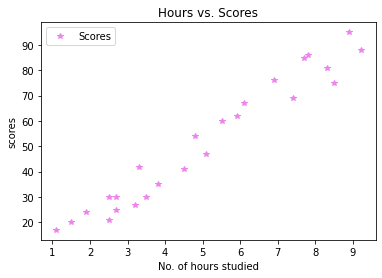

In [14]:
#plotting the distribution of scores
print('Here\'s a 2D plot')
df.plot(x='Hours', y='Scores', style='*', color= 'violet')
plt.title('Hours vs. Scores')
plt.xlabel('No. of hours studied')
plt.ylabel('scores')
plt.show()

**From the above graph we can see that there is a positive relationship between scores and the number of houurs studied.**

# *Preparation of data*
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [28]:
X= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

# *Training the Algorithm*
We have split our data into training and testing data and now is the time to train our algorithm

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Training sucessfully completed')

Training sucessfully completed


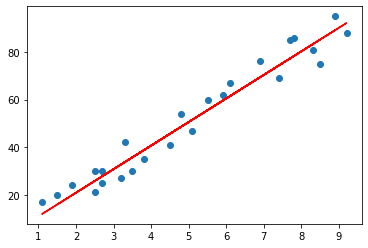

In [62]:
# Plotting the regression line
best_fitline = regressor.intercept_+regressor.coef_*X

#plotting for the test data
plt.scatter(X, y)
plt.plot(X, best_fitline, color='r');
plt.show()

# *Make Predictions*

Now is the time to test our algorithm

In [45]:
print(X_test) #testing in-'hours'
y_pred = regressor.predict(X_test) #predicting y values

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


In [46]:
# actual vs. predicted
data=pd.DataFrame({'Actual':y_test, 'predicted':y_pred })
data

,Actual,predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


### What will be predicted score if a student study for 9.25 hrs in a day?

In [79]:
hours= np.array(9.25)
hours=hours.reshape(-1,1)
pred_score =regressor.predict(hours)
print('no. of hours =', hours)
print('predicted score=', round(pred_score[0],2))

no. of hours = [[9.25]]
predicted score= 92.66


# *Evaluating the model*
Now we will conclude our task-2 by evaluating our algorithm. We have choosen mean absolute error

In [82]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.894510863410609
